###FIFA 19 RATING PREDICTIONS###

Group 11


1.   Amrendra Pratap
2.   Avani Shrivatasava
3.   Harish Dechiraju
4.   Himanshu Verma
5.   Inshu Namdev
6.   Pulkit Pandey




In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
import plotly

Reading the fifaset

In [ ]:
 from google.colab import drive

drive.mount('/content/drive', force_remount=True)

fifa = pd.read_csv('/content/drive/My Drive/data.csv')

Mounted at /content/drive


In [ ]:
fifa.shape

(18207, 89)

In [ ]:
fifa.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,...,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,...,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,...,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,...,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,...,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


fifa cleaning



In [ ]:
fifa.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

We can see now that there are a few missing values in the dataset that need to be addressed to

Moreover a search for the ids of the players revealed no duplicate data values


In [ ]:
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18207 non-null  int64  
 4   Photo                     18207 non-null  object 
 5   Nationality               18207 non-null  object 
 6   Flag                      18207 non-null  object 
 7   Overall                   18207 non-null  int64  
 8   Potential                 18207 non-null  int64  
 9   Club                      17966 non-null  object 
 10  Club Logo                 18207 non-null  object 
 11  Value                     18207 non-null  object 
 12  Wage                      18207 non-null  object 
 13  Special                   18207 non-null  int64  
 14  Prefer

So we can see here that the main values needed for predicting all are near filled with non null values (from column 54)
some need to be preprocessed though around 48 in number


In [ ]:
fifa.isnull().sum()

Unnamed: 0           0
ID                   0
Name                 0
Age                  0
Photo                0
                  ... 
GKHandling          48
GKKicking           48
GKPositioning       48
GKReflexes          48
Release Clause    1564
Length: 89, dtype: int64

In [ ]:
missing_height = fifa[fifa['Height'].isnull()].index.tolist()
fifa.drop(fifa.index[missing_height],inplace =True)

In [ ]:
def extract_value_from(value):
    x = value.replace('lbs', '')
    return float(x)


def feet_to_inches(value): 
    tmp = value.split("'")
    return int(tmp[0]) * 12 + int(tmp[1]) #converting feet to inches

fifa['Weight'] = fifa['Weight'].apply(lambda x: extract_value_from(x))
fifa['Height'] = fifa['Height'].apply(lambda x: feet_to_inches(x))

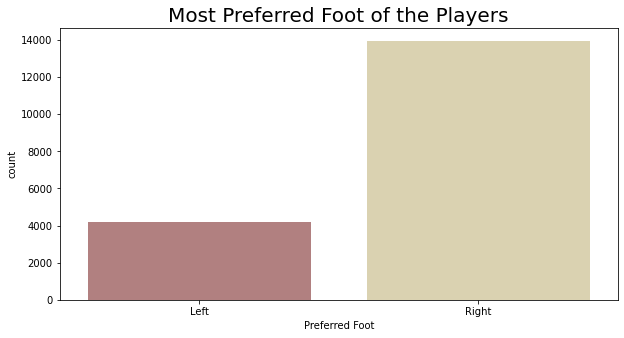

In [ ]:
plt.rcParams['figure.figsize'] = (10, 5)
sns.countplot(fifa['Preferred Foot'], palette = 'pink')
plt.title('Most Preferred Foot of the Players', fontsize = 20)
plt.show()

Held for review to see if foot can add something to ratings, for now dropping, but lets check while data analysis



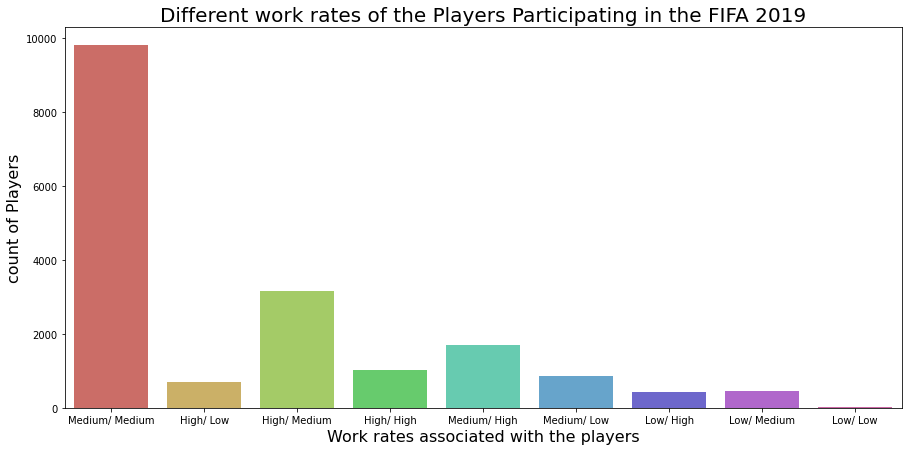

In [ ]:
plt.figure(figsize = (15, 7))

sns.countplot(x = 'Work Rate', data = fifa, palette = 'hls')
plt.title('Different work rates of the Players Participating in the FIFA 2019', fontsize = 20)
plt.xlabel('Work rates associated with the players', fontsize = 16)
plt.ylabel('count of Players', fontsize = 16)
plt.show()

Lets see if we can give numbers to this and bring in some info 

Also there are missing values in workrate and preffered foot, so since this is a skewd non float variable and the pref foot is a binary one, will replace NaN in both with  Medium/Medium and Right



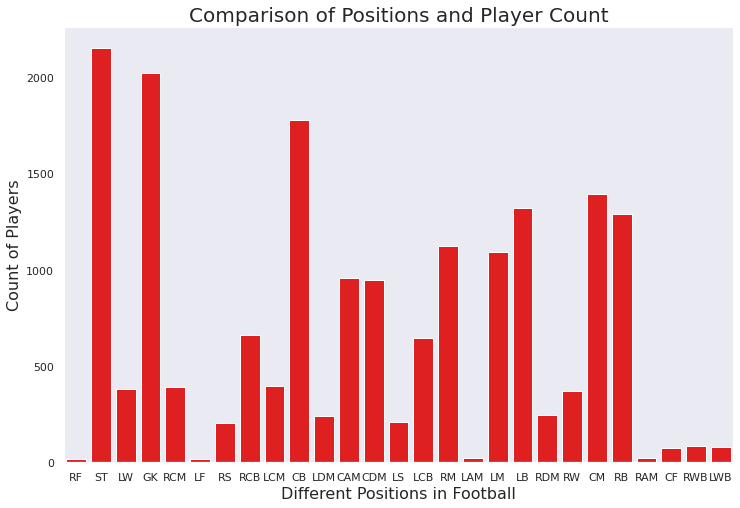

In [ ]:
plt.figure(figsize = (12, 8))
sns.set(style = 'dark', palette = 'colorblind', color_codes = True)
ax = sns.countplot('Position', data = fifa, color = 'red')
ax.set_xlabel(xlabel = 'Different Positions in Football', fontsize = 16)
ax.set_ylabel(ylabel = 'Count of Players', fontsize = 16)
ax.set_title(label = 'Comparison of Positions and Player Count', fontsize = 20)
plt.show()

Most number is ST followed by GK and CB


In [ ]:
#Preprocessing 1 

fifa['Work Rate'].fillna('Medium/ Medium', inplace = True)
fifa['Preferred Foot'].fillna('Right', inplace = True)
fifa['Position'].fillna('ST', inplace = True)

The only data that is being stored is the Position (We might need to seperately train for each position), Prefered foot, Work Rate

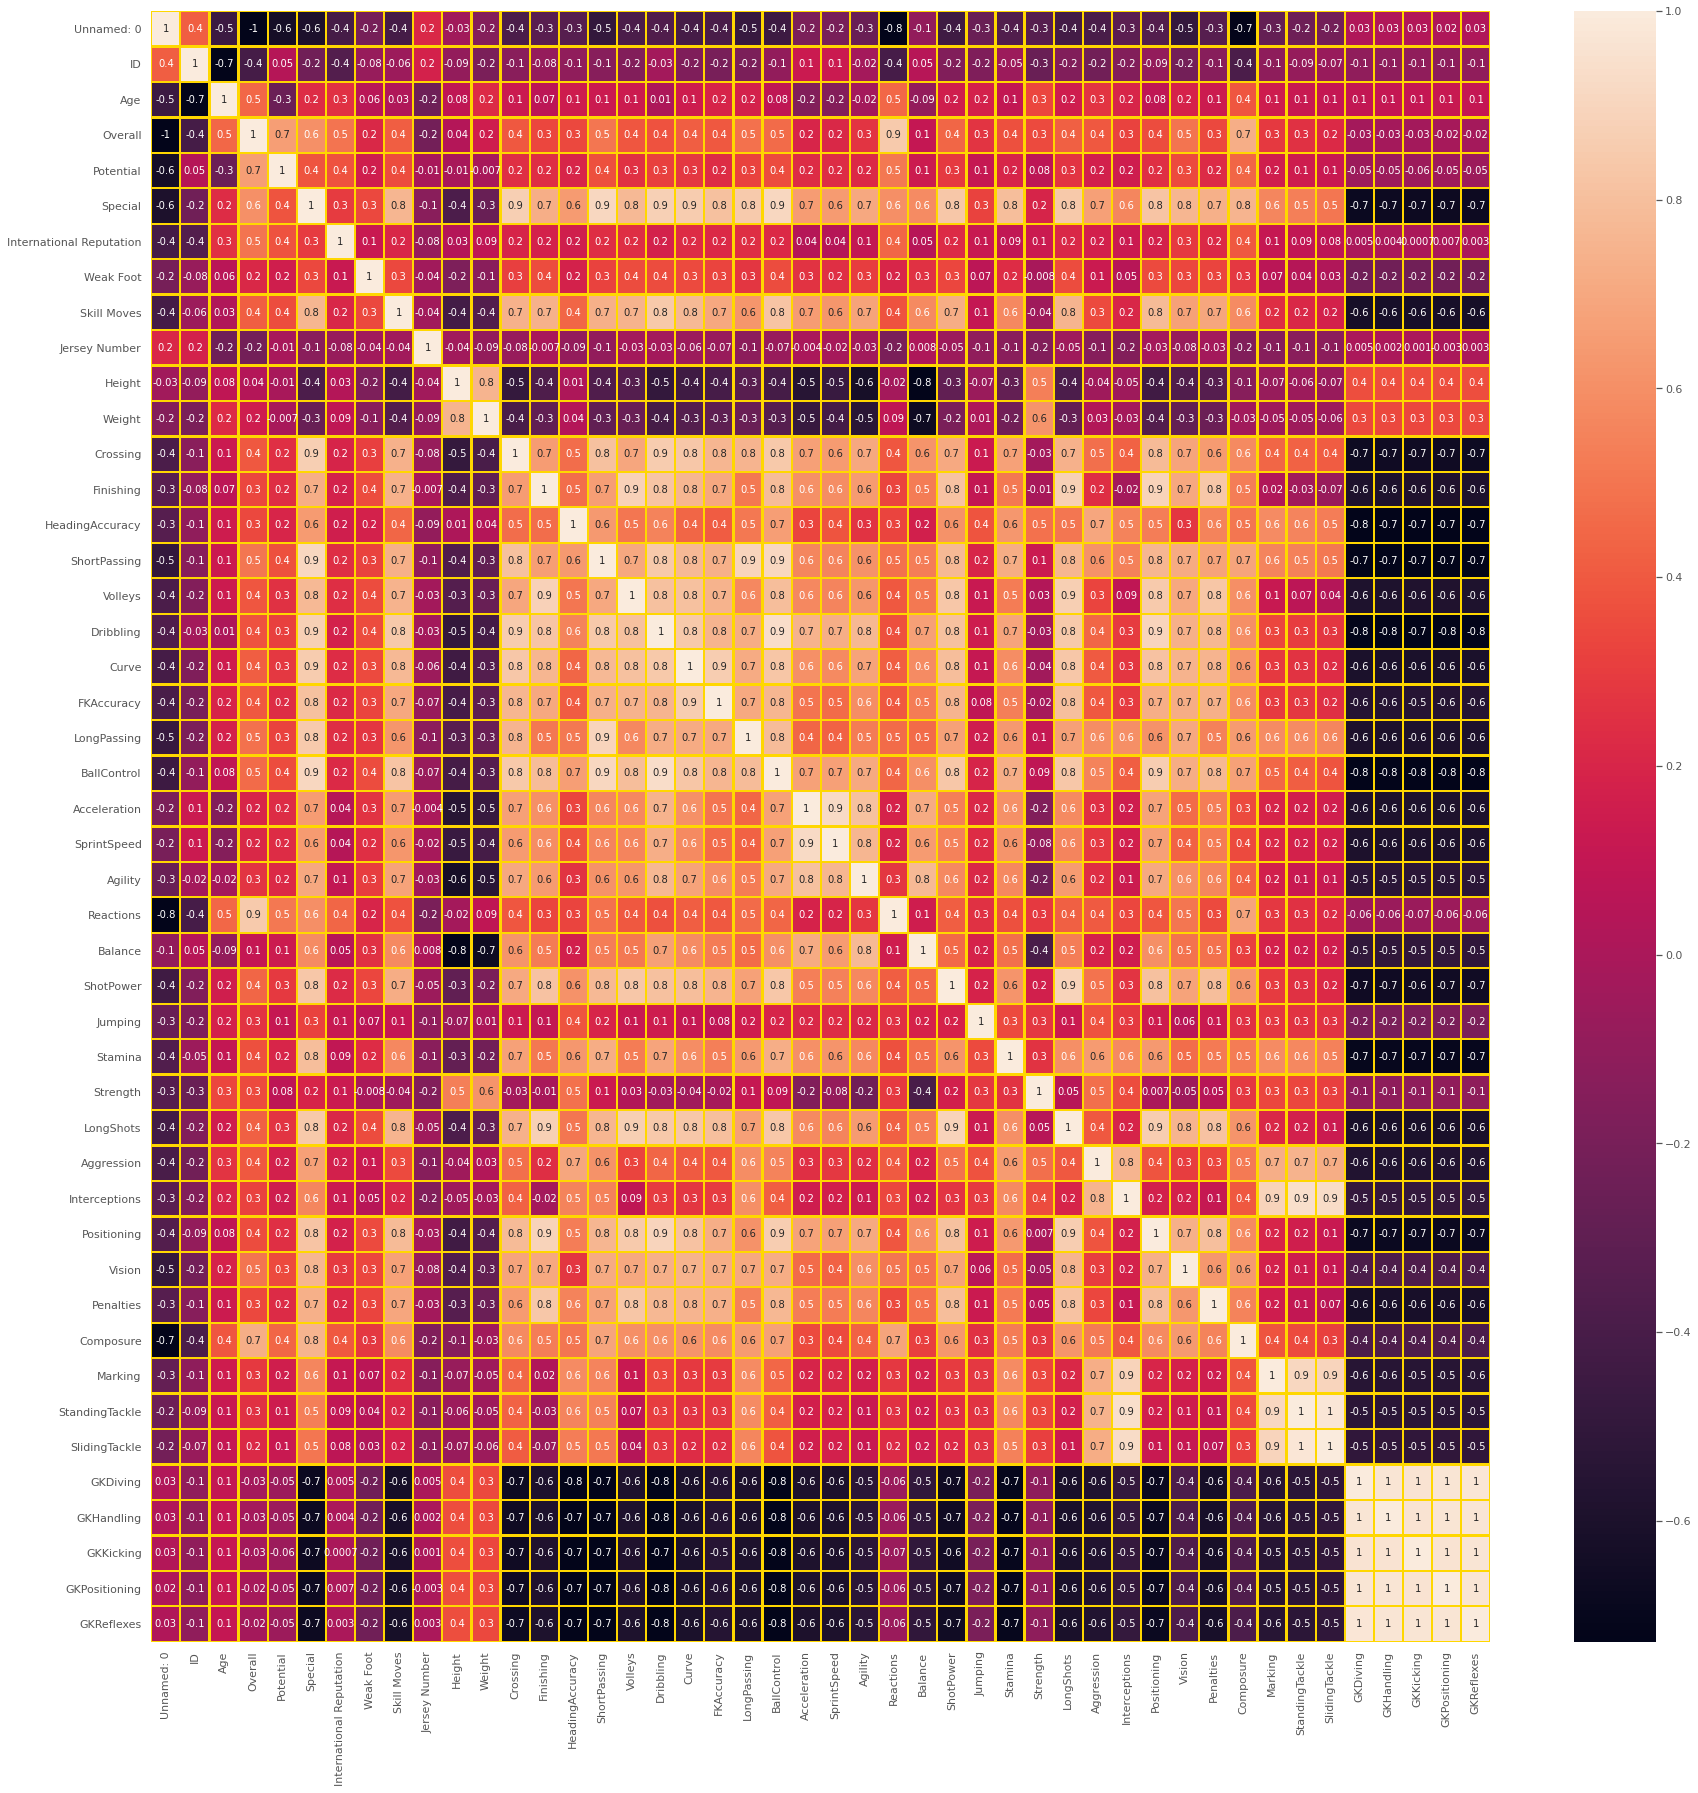

In [ ]:
plt.style.use("ggplot")
f,ax=plt.subplots(figsize = (30,30))
sns.heatmap(fifa.corr(),robust=True,fmt='.1g',linewidths=1.3,linecolor = 'gold', annot=True);

Take away



1.   Looks like we need to sperate atleast GK from general correlation, maybe club all 4 GK values and add as one might help?
2.   Reactions and composure pretty much highly ocrrelated to overall
3.   We shouldn't include potential I guess because overall generally is a subset of potential 
4.   Maybe even defenders attackers and midfiled divison is needed



A look at the dataset showed that all these missing values were for the rating 62

Not sure if we should fill in the details with mean or median or drop them 

In [ ]:
#DROP UNNECESSARY VALUES

data=fifa.copy()
drop_cols = fifa.columns[28:54]
drop_cols2 = fifa.columns[18:26]
fifa.drop(drop_cols, axis = 1, inplace = True)
fifa.drop(drop_cols2, axis = 1, inplace = True)
fifa.drop(['Unnamed: 0','ID','Name','Photo','Nationality','Flag','Club','Club Logo','Preferred Foot','Release Clause'], axis = 1, inplace = True)

#Clearing all non float values 

In [ ]:
fifa.columns

Index(['Age', 'Overall', 'Potential', 'Value', 'Wage', 'Special',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Height',
       'Weight', 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing',
       'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing',
       'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions',
       'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes'],
      dtype='object')

In [ ]:
fifa.isnull().sum()

Age                         0
Overall                     0
Potential                   0
Value                       0
Wage                        0
Special                     0
International Reputation    0
Weak Foot                   0
Skill Moves                 0
Height                      0
Weight                      0
Crossing                    0
Finishing                   0
HeadingAccuracy             0
ShortPassing                0
Volleys                     0
Dribbling                   0
Curve                       0
FKAccuracy                  0
LongPassing                 0
BallControl                 0
Acceleration                0
SprintSpeed                 0
Agility                     0
Reactions                   0
Balance                     0
ShotPower                   0
Jumping                     0
Stamina                     0
Strength                    0
LongShots                   0
Aggression                  0
Interceptions               0
Positionin

In [ ]:
fifa.describe()

,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,25.122529,66.249904,71.319126,1597.903959,1.113222,2.947299,2.361308,71.361253,165.979129,49.734181,45.550911,52.298144,58.686712,42.909026,55.371001,47.170824,42.863153,52.711933,58.369459,64.614076,64.726967,63.503607,61.836610,63.966573,55.460047,65.089432,63.219946,65.311967,47.109973,55.868991,46.698276,49.958478,53.400903,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,4.670568,6.914613,6.134420,272.862270,0.394031,0.660456,0.756164,2.649664,15.593344,18.364524,19.525820,17.379909,14.699495,17.694408,18.910371,18.395264,17.478763,15.327870,16.686595,14.927780,14.649953,14.766049,9.010464,14.136166,17.237958,11.820044,15.894741,12.557000,19.260524,17.367967,20.696909,19.529036,14.146881,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,61.000000,110.000000,5.000000,2.000000,4.000000,7.000000,4.000000,4.000000,6.000000,3.000000,9.000000,5.000000,12.000000,12.000000,14.000000,21.000000,16.000000,2.000000,15.000000,12.000000,17.000000,3.000000,11.000000,3.000000,2.000000,10.000000,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,69.000000,154.000000,38.000000,30.000000,44.000000,54.000000,30.000000,49.000000,34.000000,31.000000,43.000000,54.000000,57.000000,57.000000,55.000000,56.000000,56.000000,45.000000,58.000000,56.000000,58.000000,33.000000,44.000000,26.000000,38.000000,44.000000,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,71.000000,165.000000,54.000000,49.000000,56.000000,62.000000,44.000000,61.000000,48.000000,41.000000,56.000000,63.000000,67.000000,67.000000,66.000000,62.000000,66.000000,59.000000,66.000000,66.000000,67.000000,51.000000,59.000000,52.000000,55.000000,55.000000,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,73.000000,176.000000,64.000000,62.000000,64.000000,68.000000,57.000000,68.000000,62.000000,57.000000,64.000000,69.000000,75.000000,75.000000,74.000000,68.000000,74.000000,68.000000,73.000000,74.000000,74.000000,62.000000,69.000000,64.000000,64.000000,64.000000,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,81.000000,243.000000,93.000000,95.000000,94.000000,93.000000,90.000000,97.000000,94.000000,94.000000,93.000000,96.000000,97.000000,96.000000,96.000000,96.000000,96.000000,95.000000,95.000000,96.000000,97.000000,94.000000,95.000000,92.000000,95.000000,94.000000,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90

In [ ]:
def general(data):
    return int(round((data[['HeadingAccuracy', 'Dribbling', 'Curve', 
                            'BallControl']].mean()).mean()))

def mental(data):
    return int(round((data[['Aggression', 'Interceptions', 'Positioning', 
                            'Vision','Composure']].mean()).mean()))

def mobility(data):
    return int(round((data[['Acceleration', 'SprintSpeed', 
                            'Agility']].mean()).mean()))

def power(data):
    return int(round((data[['Balance', 'Jumping', 'Stamina', 
                            'Strength']].mean()).mean()))

def shooting(data):
    return int(round((data[['Finishing', 'Volleys', 'FKAccuracy', 
                            'ShotPower','LongShots', 'Penalties']].mean()).mean()))

def passing(data):
    return int(round((data[['Crossing', 'ShortPassing', 
                            'LongPassing']].mean()).mean()))

def defending(data):
    return int(round((data[['Marking', 'StandingTackle', 
                            'SlidingTackle']].mean()).mean()))

def goalkeeping(data):
    return int(round((data[['GKDiving', 'GKHandling', 'GKKicking', 
                            'GKPositioning', 'GKReflexes']].mean()).mean()))


In [ ]:
fifa['General'] = fifa.apply(general, axis = 1)
fifa['Mental'] = fifa.apply(mental, axis =1)
fifa['Mobility'] = fifa.apply(mobility, axis = 1)
fifa['Power'] = fifa.apply(power, axis = 1)
fifa['Shooting'] = fifa.apply(shooting, axis = 1)
fifa['Passing'] = fifa.apply(passing, axis = 1)
fifa['Defending'] = fifa.apply(defending, axis =1)
fifa['Goalkeeping'] = fifa.apply(goalkeeping, axis = 1)

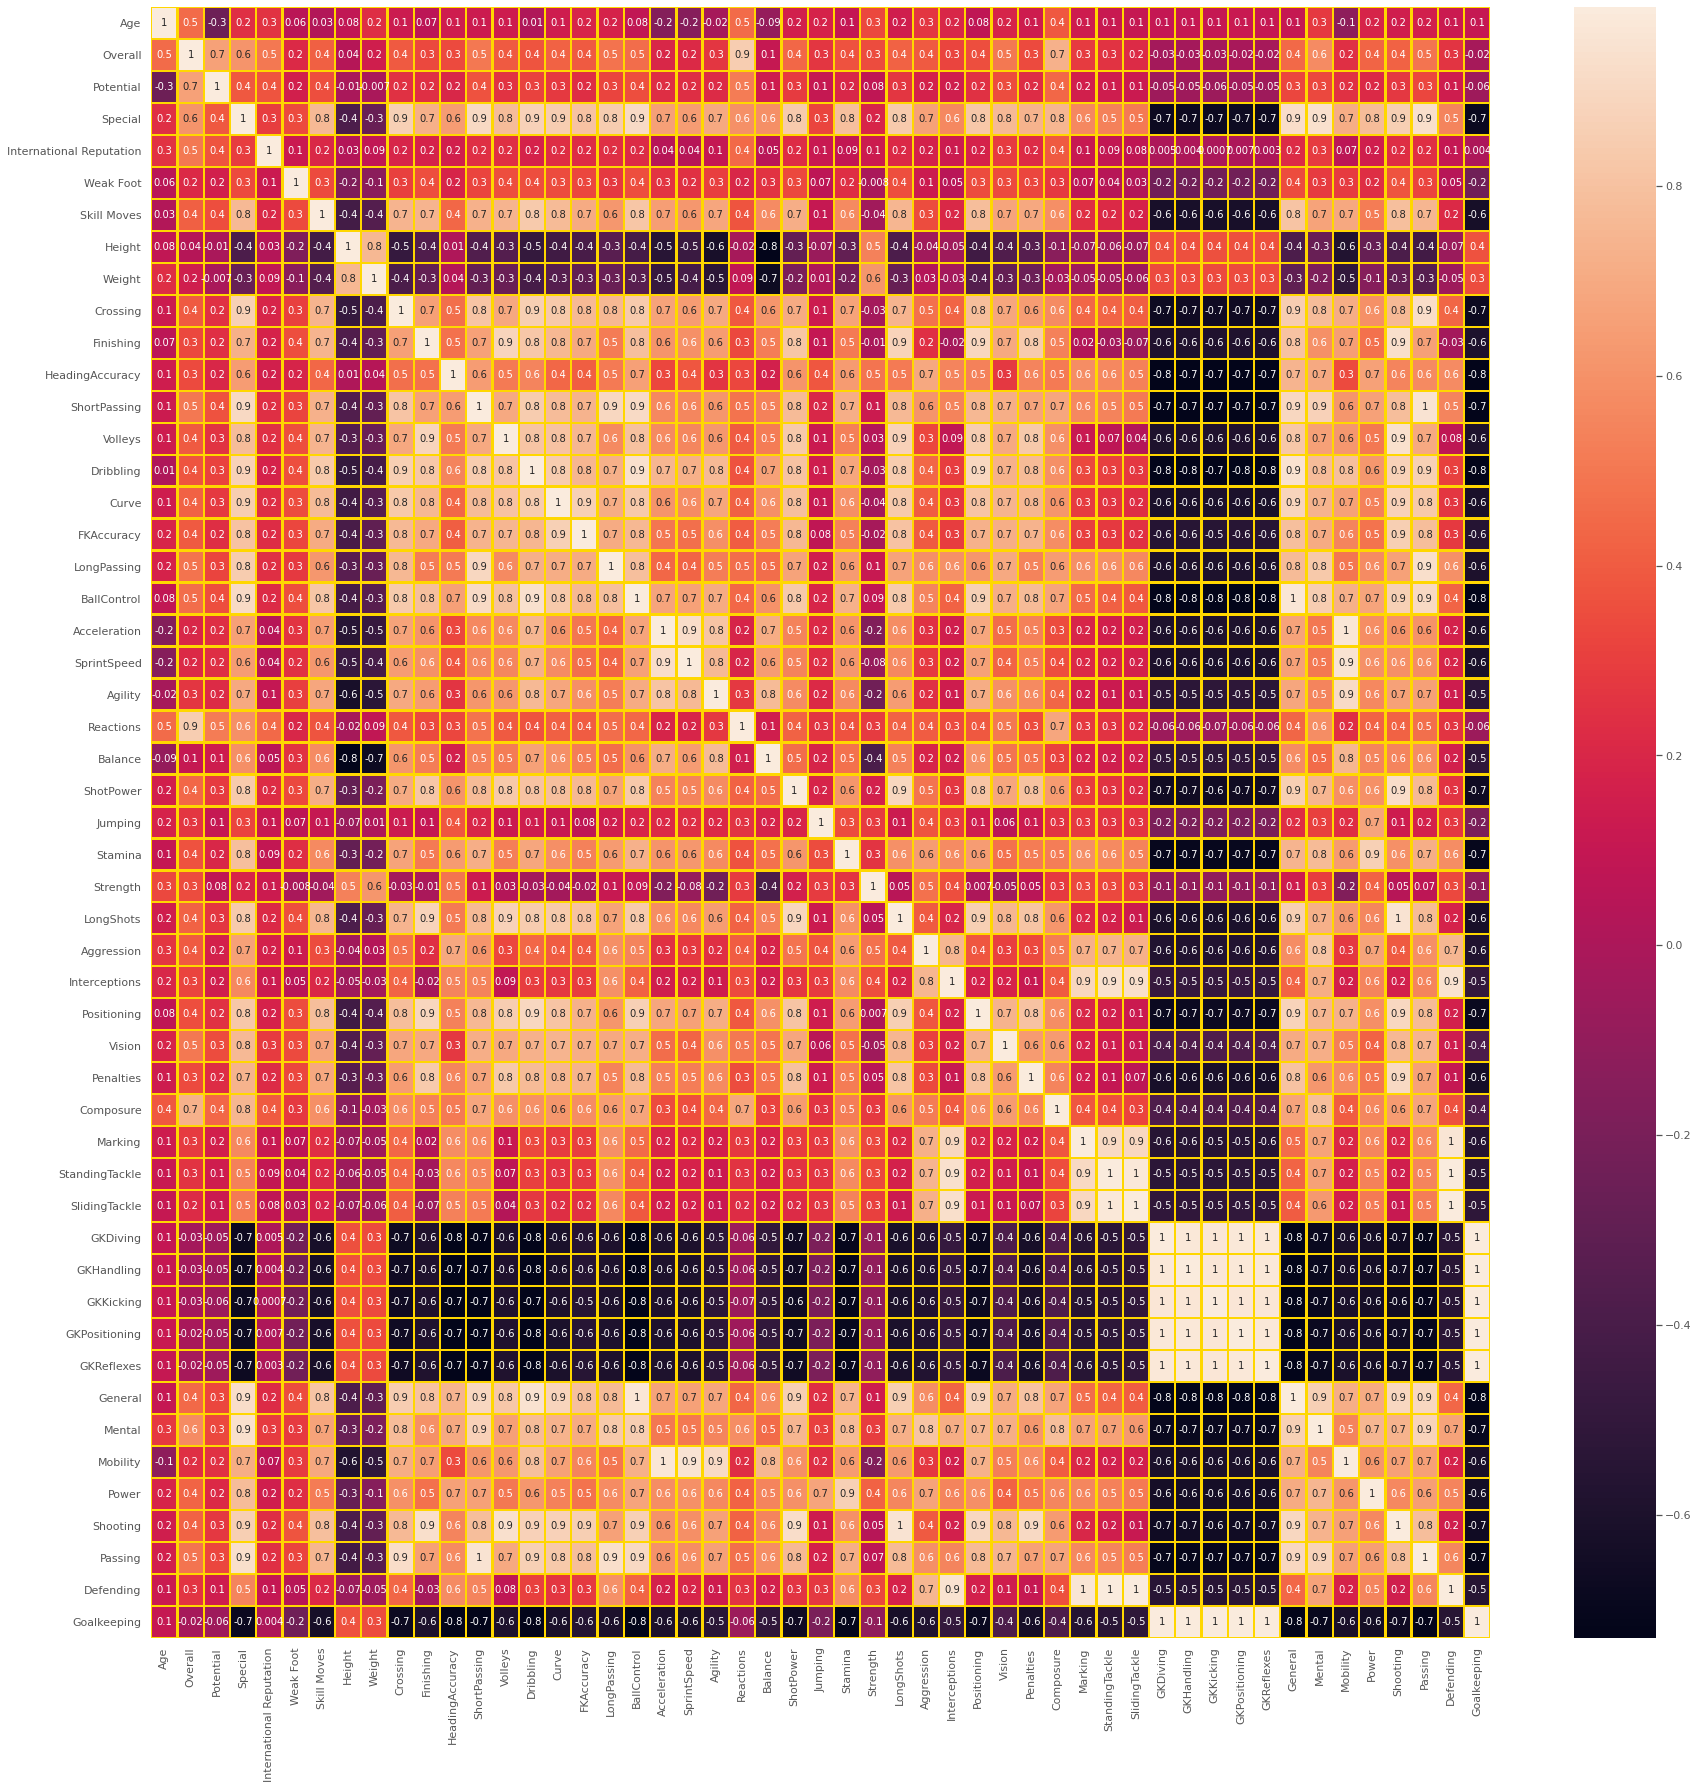

In [ ]:
plt.style.use("ggplot")
f,ax=plt.subplots(figsize = (30,30))
sns.heatmap(fifa.corr(),robust=True,fmt='.1g',linewidths=1.3,linecolor = 'gold', annot=True);

In [ ]:
fifa.drop(['HeadingAccuracy', 'Dribbling', 'Curve', 'BallControl','Aggression', 'Interceptions', 'Positioning', 'Height', 'Weight',
                            'Vision','Composure','Acceleration', 'SprintSpeed', 
                            'Agility','Balance', 'Jumping', 'Stamina', 
                            'Strength','Finishing', 'Volleys', 'FKAccuracy', 
                            'ShotPower','LongShots', 'Penalties','Crossing', 'ShortPassing', 
                            'LongPassing','Marking', 'StandingTackle', 
                            'SlidingTackle','GKDiving', 'GKHandling', 'GKKicking', 
                            'GKPositioning', 'GKReflexes'], axis = 1, inplace = True) 

## DATA VISUALISATION

In [ ]:
def convert_currency(value):
    x = value.replace('€', '')
    if 'M' in x:
        x = float(x.replace('M', ''))*100000
    elif 'K' in value:
        x = float(x.replace('K', ''))*1000
    return float(x)

In [ ]:
fifa['Value'] =  fifa['Value'].apply(lambda x: convert_currency(x))
fifa['Wage'] =  fifa['Wage'].apply(lambda x: convert_currency(x))

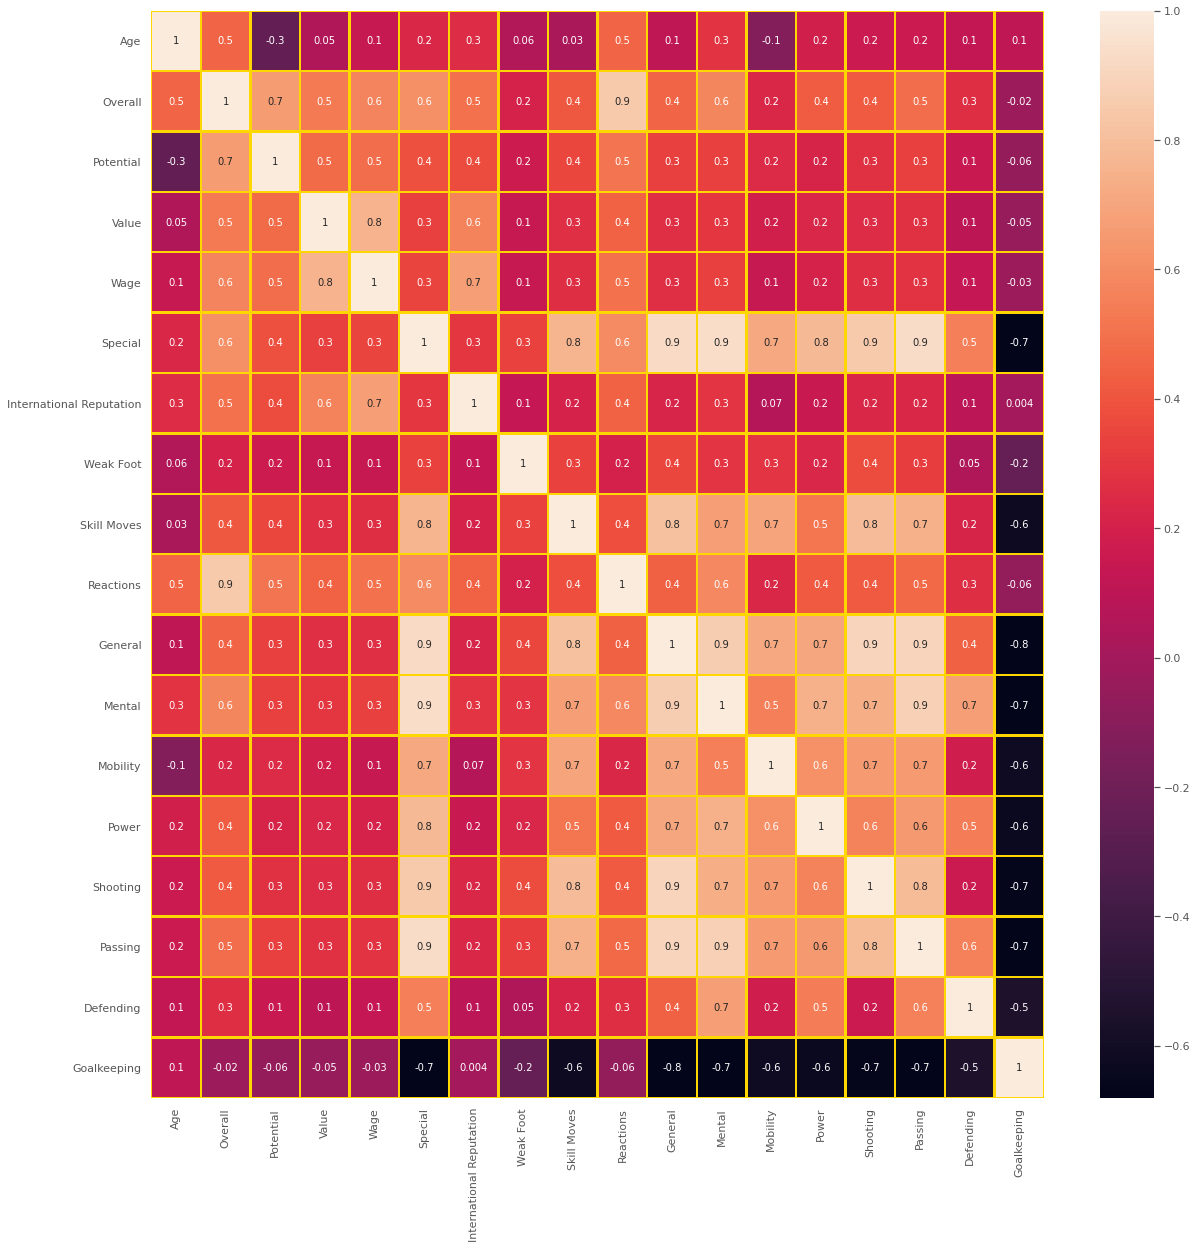

In [ ]:
plt.style.use("ggplot")
f,ax=plt.subplots(figsize = (20,20))
sns.heatmap(fifa.corr(),robust=True,fmt='.1g',linewidths=1.3,linecolor = 'gold', annot=True);

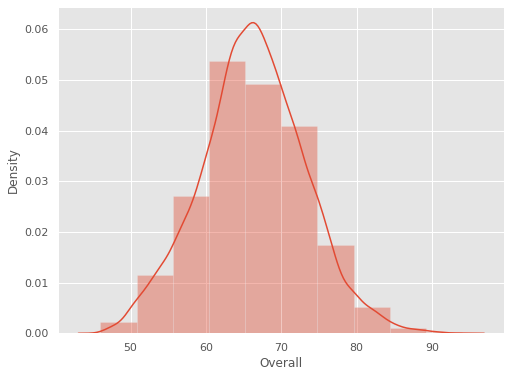

In [ ]:
f, ax = plt.subplots(figsize=(8,6))
x = fifa['Overall']
ax = sns.distplot(x, bins =10)
plt.show()

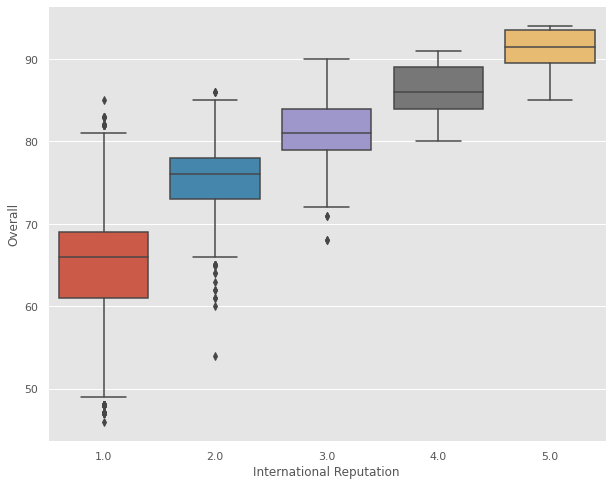

In [ ]:
f, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(x="International Reputation", y="Overall", data=fifa)
plt.show()

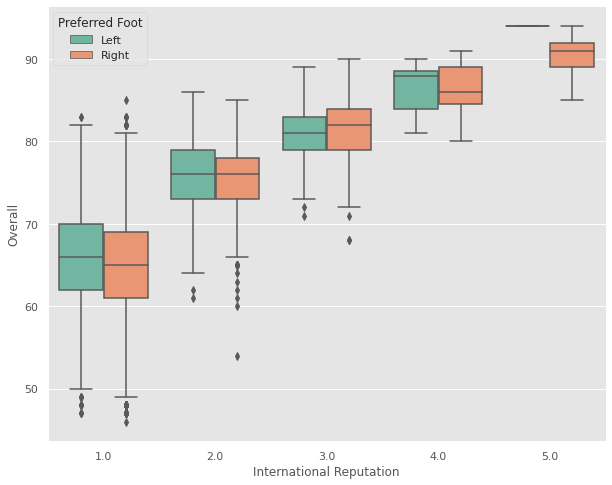

In [ ]:
f, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(x="International Reputation", y="Overall", hue="Preferred Foot", data=data, palette="Set2")
plt.show()

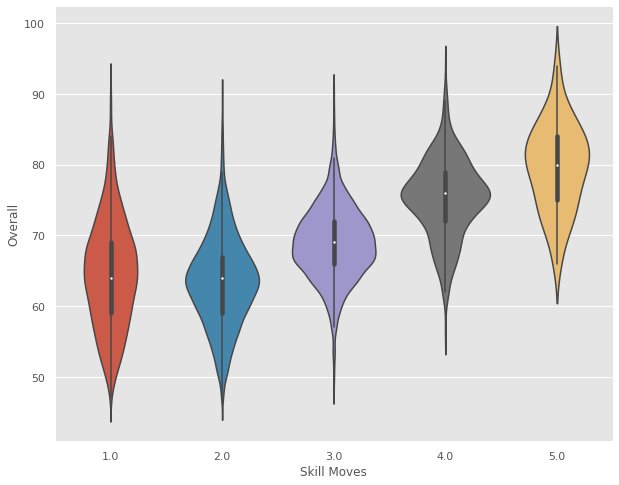

In [ ]:
f, ax = plt.subplots(figsize=(10, 8))
sns.violinplot(x="Skill Moves", y="Overall", data=fifa)
plt.show()

In [ ]:
f, ax = plt.subplots(figsize=(10, 8))
sns.violinplot(x="Weak Foot", y="Overall", data=fifa)
plt.show()

NameError: ignored

In [ ]:
fifa_val = fifa[['Overall', 'Age', 'Potential', 'Mental', 'Passing', 'Goalkeeping']]
data_val = data[['Preferred Foot', 'Position', 'Work Rate']]
fifa_new = pd.concat([fifa_val, data_val], axis=1)

#ADDED THE HUES TO THE PAIR PLOT VARIABLE SET

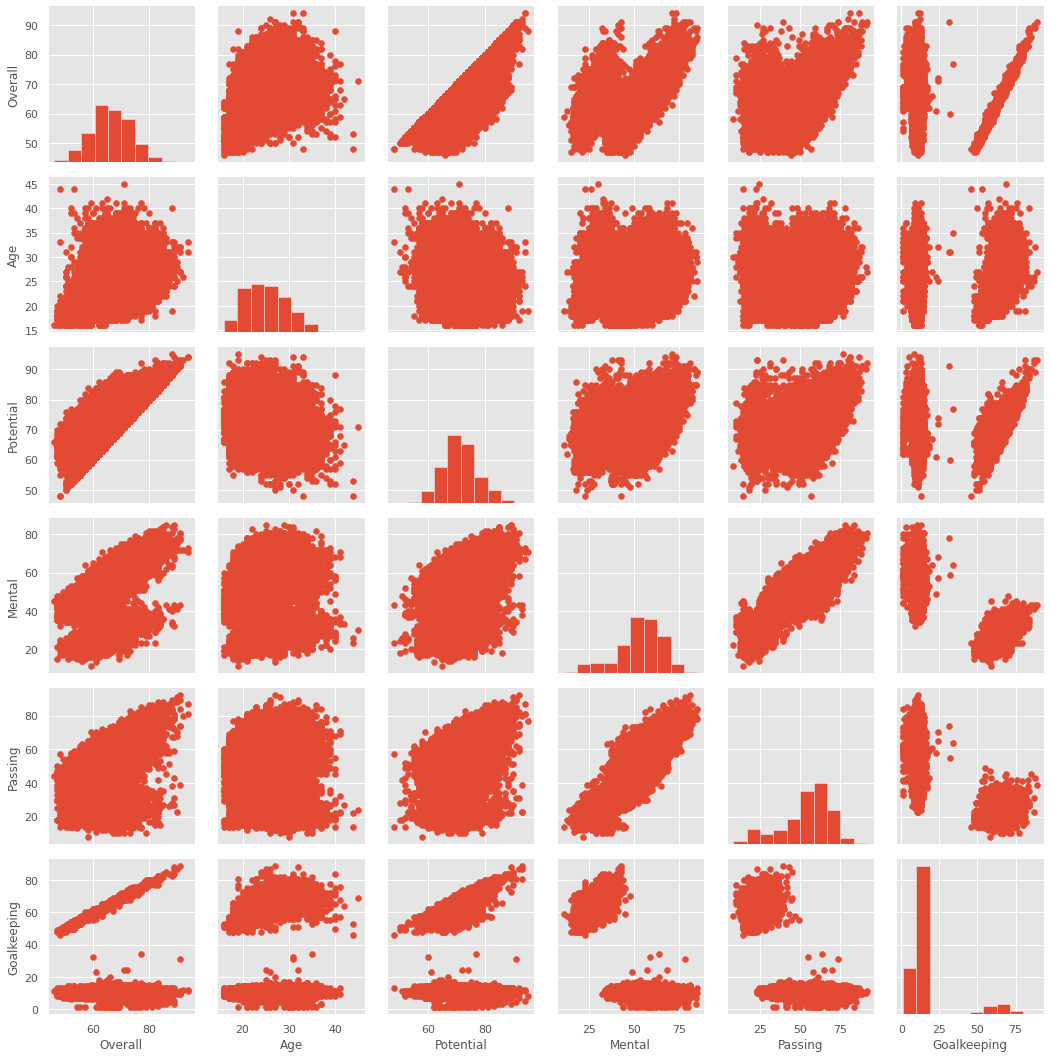

In [ ]:
g = sns.PairGrid(fifa_new)

g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter)

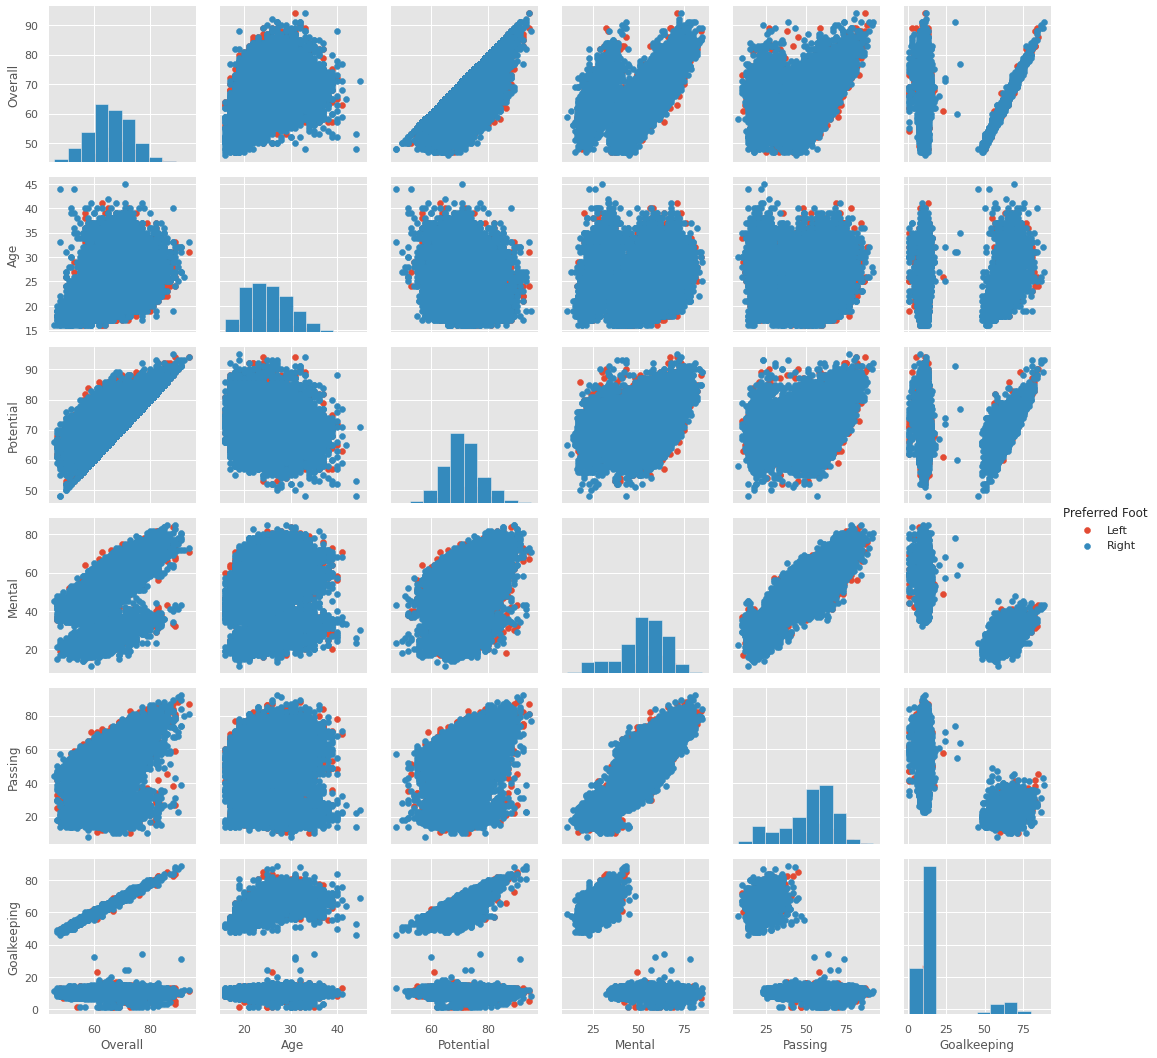

In [ ]:
g = sns.PairGrid(fifa_new, hue="Preferred Foot")
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter)
g = g.add_legend()

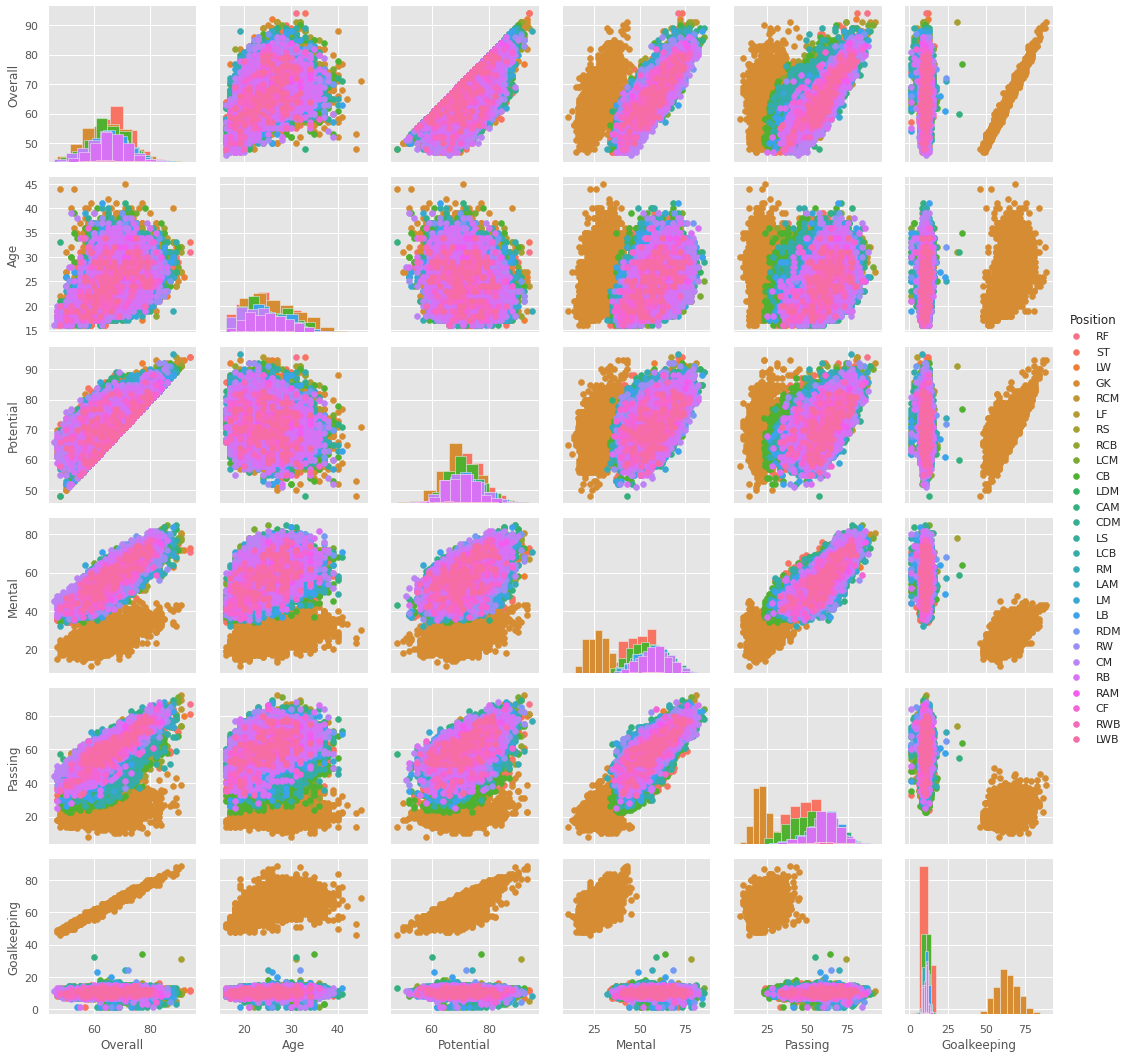

In [ ]:
g = sns.PairGrid(fifa_new, hue="Position")
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter)
g = g.add_legend()

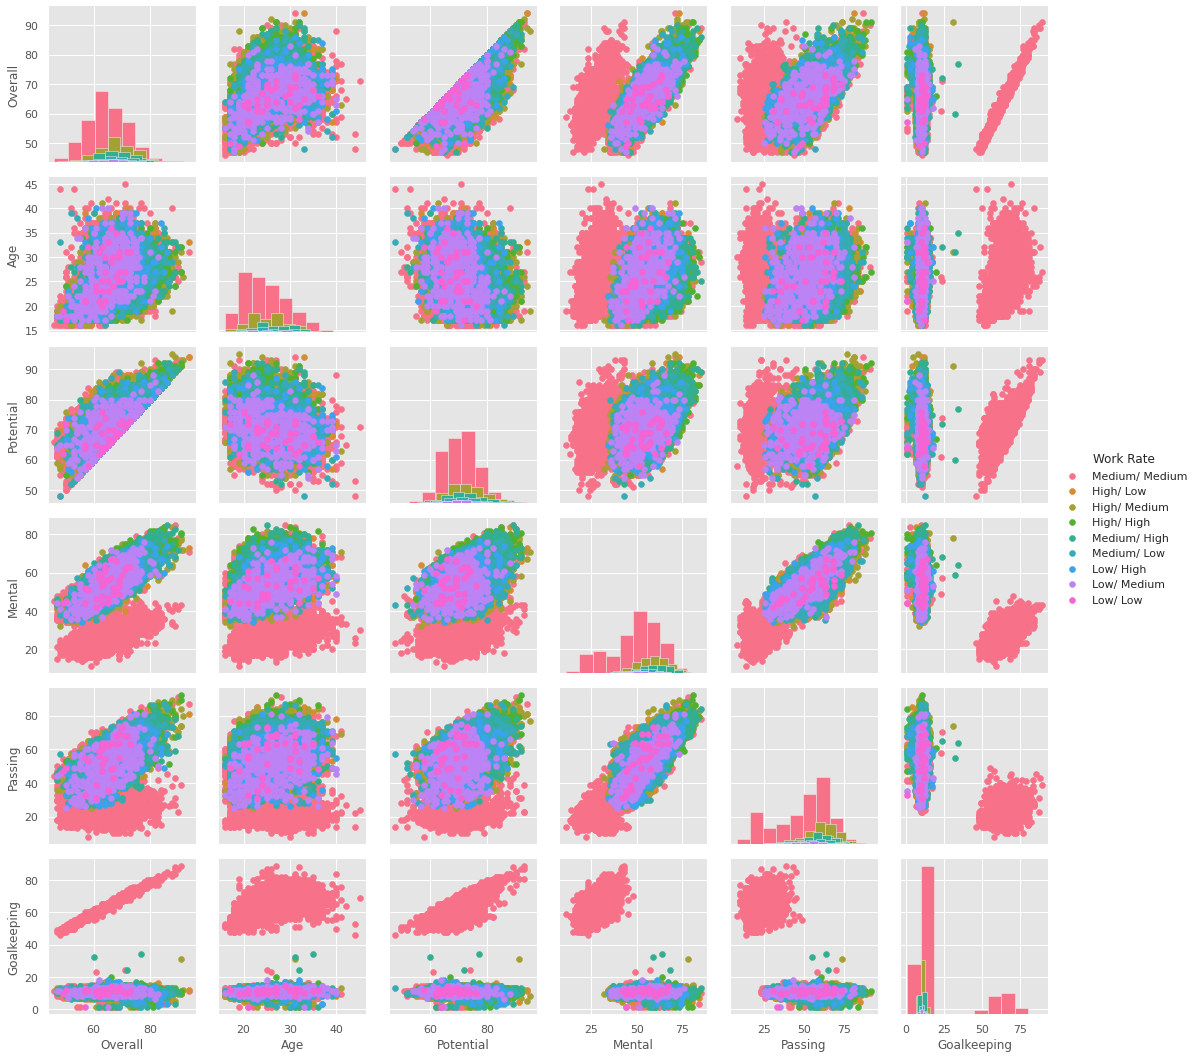

In [ ]:
g = sns.PairGrid(fifa_new, hue="Work Rate")
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter)
g = g.add_legend()

In [ ]:
data_pos = data[['Position']]
fifa_reformed = pd.concat([fifa, data_pos], axis=1)

In [ ]:
fifa.head()

,Age,Overall,Potential,Value,Wage,Special,International Reputation,Weak Foot,Skill Moves,Reactions,General,Mental,Mobility,Power,Shooting,Passing,Defending,Goalkeeping
0,31,94,94,11050000.0,565000.0,2202,5.0,4.0,4.0,95.0,89,71,89,74,88,87,29,11
1,33,94,94,7700000.0,405000.0,2228,5.0,4.0,5.0,96.0,88,73,89,83,88,81,27,12
2,26,92,93,11850000.0,290000.0,2143,5.0,5.0,5.0,94.0,85,72,93,69,84,80,28,12
3,27,91,93,7200000.0,260000.0,1471,4.0,3.0,1.0,90.0,26,43,58,54,21,39,16,89
4,27,91,92,10200000.0,355000.0,2281,4.0,5.0,4.0,91.0,79,81,78,76,85,92,59,11


In [ ]:
fifa_reformed.head()

,Age,Overall,Potential,Value,Wage,Special,International Reputation,Weak Foot,Skill Moves,Reactions,General,Mental,Mobility,Power,Shooting,Passing,Defending,Goalkeeping,Position
0,31,94,94,11050000.0,565000.0,2202,5.0,4.0,4.0,95.0,89,71,89,74,88,87,29,11,RF
1,33,94,94,7700000.0,405000.0,2228,5.0,4.0,5.0,96.0,88,73,89,83,88,81,27,12,ST
2,26,92,93,11850000.0,290000.0,2143,5.0,5.0,5.0,94.0,85,72,93,69,84,80,28,12,LW
3,27,91,93,7200000.0,260000.0,1471,4.0,3.0,1.0,90.0,26,43,58,54,21,39,16,89,GK
4,27,91,92,10200000.0,355000.0,2281,4.0,5.0,4.0,91.0,79,81,78,76,85,92,59,11,RCM


In [ ]:
fifa_reformed.to_csv('data_reformed.csv')
!cp data_reformed.csv "drive/My Drive/"

In [ ]:
fifa.to_csv('data_comb.csv')
!cp data_comb.csv "drive/My Drive/"